# **Improving Employee Retention By Predicting Employee Attrition Using Machine Learning**

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('Dataset CSV Version.csv')

In [3]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
81,brainySalt8,105538,Lainnya,Pria,FullTime,Data Engineer,Freshgraduate_program,Kurang,Jakarta Barat,Employee_Referral,3,5.0,0.0,0.0,3.0,+6283112563xxx,brainySalt8580@proton.com,Sarjana,1,NaN,masih_bekerja,1977-09-08,2013-07-08,2020-1-14,-
31,somberBoars0,106411,Bercerai,Pria,Outsource,Software Engineer (Front End),Mid_level,Bagus,Jakarta Barat,Diversity_Job_Fair,3,4.0,0.0,0.0,4.0,+6281307483xxx,somberBoars0230@proton.com,Magister,1,NaN,masih_bekerja,1984-11-06,2011-2-21,2015-4-19,-
87,peskyPudding8,110423,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Diversity_Job_Fair,3,2.0,6.0,0.0,14.0,+6289859069xxx,peskyPudding8206@hotmail.com,Sarjana,1,NaN,masih_bekerja,1987-11-24,2008-10-27,2020-1-15,-
206,similarHeron2,100799,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,7.0,+6281305913xxx,similarHeron2961@hotmail.com,Magister,1,NaN,NaN,1971-07-10,2014-07-07,2015-1-15,-
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


In [4]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 287
Number of columns 25


The original dataframe has 287 rows and 25 columns.

In [5]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Username,object,0,0.00,0,285,"[spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7]"
1,EnterpriseID,int64,0,0.00,0,287,"[111065, 106080, 106452, 106325, 111171]"
2,StatusPernikahan,object,0,0.00,0,5,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,JenisKelamin,object,0,0.00,0,2,"[Pria, Wanita]"
4,StatusKepegawaian,object,0,0.00,0,3,"[Outsource, FullTime, Internship]"
5,Pekerjaan,object,0,0.00,0,14,"[Software Engineer (Back End), Data Analyst, Software Engineer (Front End), Product Manager, Software Engineer (Android)]"
6,JenjangKarir,object,0,0.00,0,3,"[Freshgraduate_program, Senior_level, Mid_level]"
7,PerformancePegawai,object,0,0.00,0,5,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Kurang]"
8,AsalDaerah,object,0,0.00,0,5,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, Jakarta Selatan, Jakarta Barat]"
9,HiringPlatform,object,0,0.00,0,9,"[Employee_Referral, Website, Indeed, LinkedIn, CareerBuilder]"


## **About The Dataset**

**Overview:**
- Dataset contains 287 rows, 25 features.

- Dataset consists of 3 data types; float64, int64 and object.

- `TanggalLahir`, `TanggalHiring`, `TanggalPenilaianKaryawan`, `TanggalResign` feature will be changed from object into datetime data type.

- Dataset contains null values in various columns, will be handled after checking the distribution for proper imputation method. As for `IkutProgramLOP` will directly drop since it has high missing percentage. Also some columns that have "-" values will need to be considered as null values and filtered later. We only have 287 rows of data which is very small so dropping rows might not be the best approach for our model training.

- Some columns like `SkorSurveyEngagement`, `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `JumlahKetidakhadiran`, `IkutProgramLOP` have float data type when it doesn't actually need or representative in decimal value, these feature data type will be changed to integer.

- `PernahBekerja` column have invalid value, it normally should be binary but instead it has 1 and yes. This column will be dropped or the values will need to be re-checked.

- Originally there is no column to determine whether an employee resigned or not, this will be extracted from `TanggalResign` column later.

- (Optional) Changing the name of some columns or the values to standardize the overall writing format might be necessary. For values it probably more prioritized because the format varies so much compared to column names, as for the format of the values will follow `Pekerjaan` column format (ex: Product Manager, Data Analyst, etc)

**Feature Descriptions**

- `Username`: Username of the employee account
- `EnterpriseID`: ID of the employee in the company
- `StatusPernikahan`: Marital status of the employee
- `JenisKelamin`: Gender of the employee
- `StatusKepegawaian`: Employment status of the employee
- `Pekerjaan`: Role of the employee
- `JenjangKarir`: Level of experience of the employee
- `PerformancePegawai`: Employee performance category score
- `AsalDaerah`: Employee region of origin
- `HiringPlatform`: Platform the employee application is accepted
- `SkorSurveyEngagement`: Level of employee engagement within the organization
- `SkorKepuasanPegawai`: Level of how satisfied employees are with their job and the workplace
- `JumlahKeikutsertaanProjek`: Number of times the employee join a project
- `JumlahKeterlambatanSebulanTerakhir`: Number of times the employee is late
- `JumlahKetidakhadiran`: Number of times the employee is absent
- `NomorHP`: Handphone number of the employee
- `Email`: Personal email of the employee
- `TingkatPendidikan`: Education level Handphone number of the employee
- `PernahBekerja`: Whether the employee have previous work experience or not
- `IkutProgramLOP`: Whether the employee join LOP Program or not
- `AlasanResign`: Reason for resignation of the employee
- `TanggalLahir`: Birth date of the employee
- `TanggalHiring`: Hiring date of the employee
- `TanggalPenilaianKaryawan`: Scoring date of the employee
- `TanggalResign`: Resignation date of the employee

## Initial Transformation

In [6]:
df['PernahBekerja'].value_counts()

PernahBekerja
1      286
yes      1
Name: count, dtype: int64

Even if the 'yes' value in `PernahBekerja` column originally should be 0, this column doesn't mean anything. So this column will be drop also because it doesn't provide valuable information
for analysis or modeling.

In [7]:
# Drop columns that have invalid and large missing percentage
df.drop(columns=['PernahBekerja', 'IkutProgramLOP'], inplace=True)

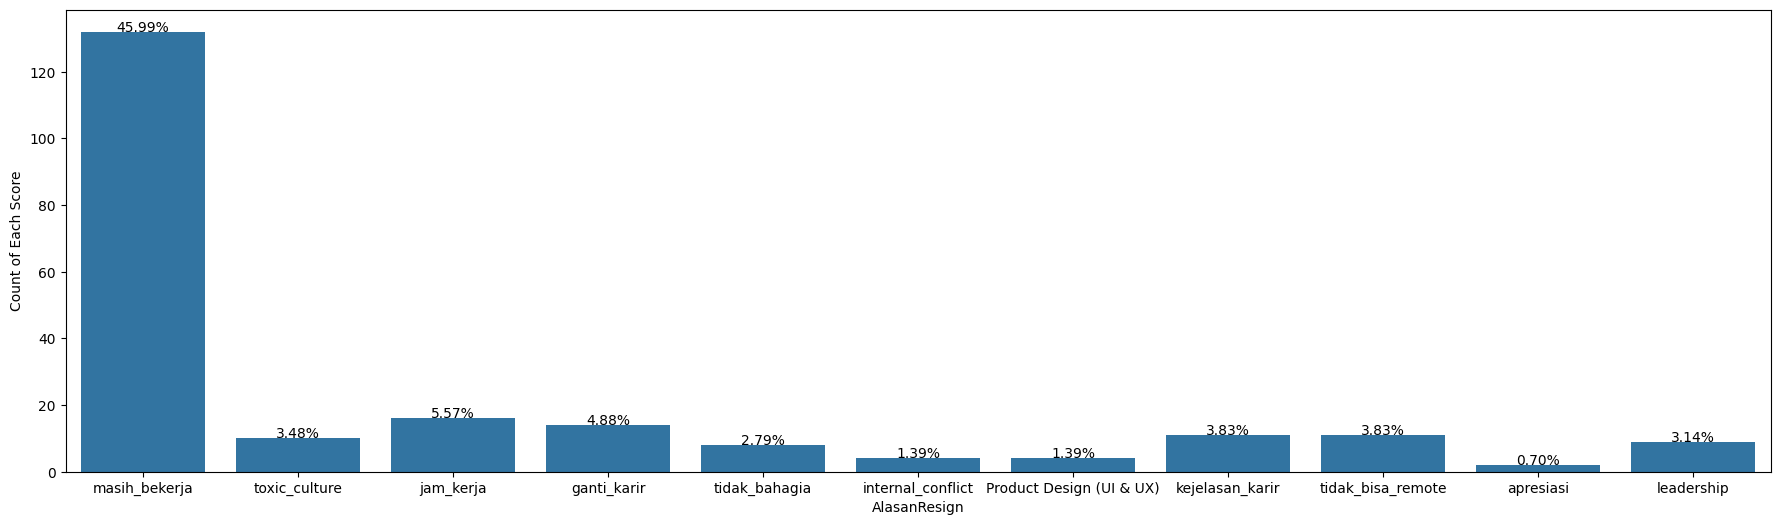

In [8]:
# Check categorical distribution for AlasanResign column for proper imputation method
plt.figure(figsize=(22, 6))
ax = sns.countplot(data=df, x='AlasanResign')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Score')
plt.show()

In [9]:
# Additional analysis for AlasanResign column imputation - NaN value imputation
df[df['AlasanResign'].isna()]['TanggalResign'].value_counts()

TanggalResign
-    66
Name: count, dtype: int64

- As we can see that all the null values of AlasanResign column is actually data where the employee resigned. Since we will extract this column as new column whether a employee resigned or not, this it's not the best solution to impute the value with mode since it will make the value of AlasanResign into 'Masih Bekerja', but in reality they already resigned.

- Which is why as for the missing values in AlasanResign we will impute with 'Other Reasons', we also will replace the 'Product Design (UI & UX)' with that values.

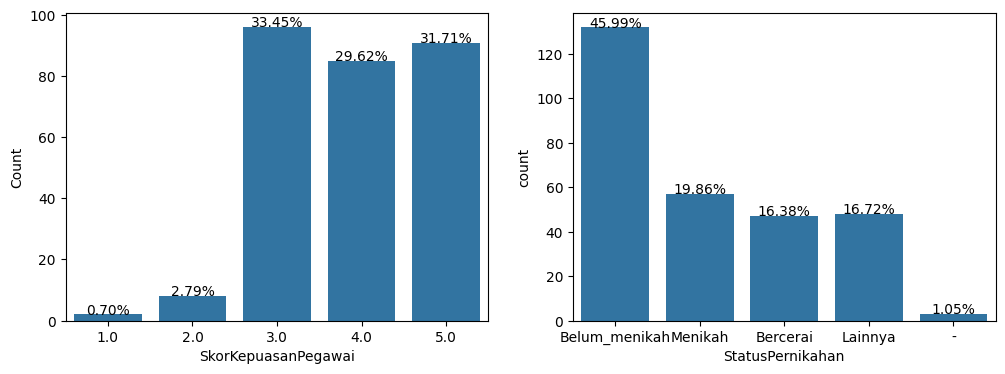

In [10]:
# Check categorical distribution for SkorKepuasanPegawai and StatusPernikahan column for proper imputation method
impute_cat_cols = ['SkorKepuasanPegawai', 'StatusPernikahan']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i, col in enumerate(impute_cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i])

    # Calculate the percentage for each category and annotate bars
    total = float(len(df))
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x() + p.get_width() / 2.,
                    height + 0.1,
                    '{:.2f}%'.format((height / total) * 100),
                    ha="center")

ax[0].set_ylabel('Count')
plt.show()

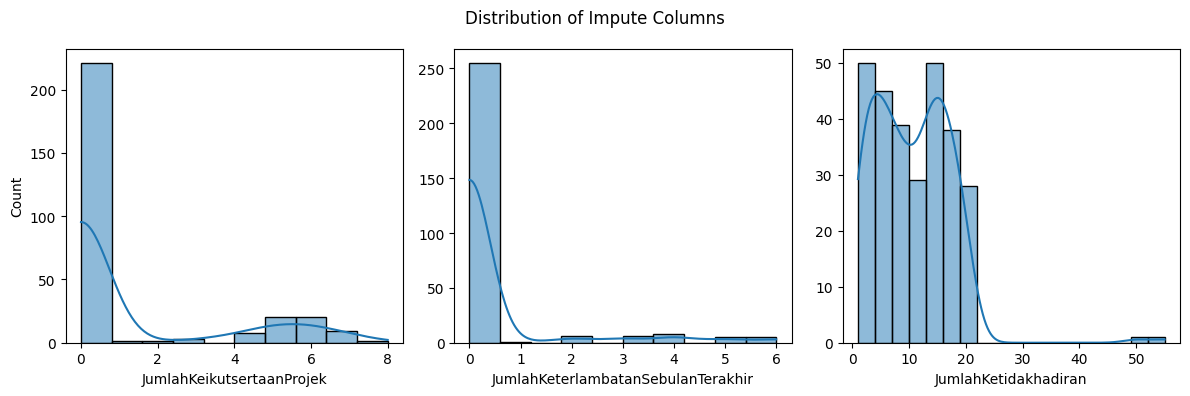

In [11]:
# Checking distribution in numerical columns with missing value for proper imputation method
impute_num_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot histograms for each column
for i, col in enumerate(impute_num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

> Imputation method based on distribution and other factors:

- `AlasanResign` : value of 'Other Reasons'
- `SkorKepuasanPegawai` : median
- `StatusPernikahan` : mode
- `JumlahKeikutsertaanProjek` : mode (will most definitely the same as it's median)
- `JumlahKeterlambatanSebulanTerakhir` : mode (will most definitely the same as it's median)
- `JumlahKetidakhadiran` : median

In [12]:
# Impute missing values and replace invalid/out of context values
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mode()[0])
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mode()[0])
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median())
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median())
df['AlasanResign'] = df['AlasanResign'].fillna('Other Reasons')

df['StatusPernikahan'] = df['StatusPernikahan'].replace({'-' : df['StatusPernikahan'].mode()[0]})
df['AlasanResign'] = df['AlasanResign'].replace({'Product Design (Ui & Ux)' : 'Other Reasons'})

In [13]:
# Rename value names in some columns to maintain format similarity
def column_values_correction(column_values):
    new_column_values = []
    for value in column_values:
        if isinstance(value, str):
            # Split the value by underscores and capitalize each word
            words = value.split('_')
            titled_words = [word.title() for word in words]
            
            # Join the words with spaces
            new_value = ' '.join(titled_words)
            new_column_values.append(new_value)
        else:
            # If the value is not a string (e.g., NaN), keep it unchanged
            new_column_values.append(value)
    return new_column_values

# List of columns for correction
selected_columns = ['StatusPernikahan', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'HiringPlatform', 'AlasanResign']

# Process the specified columns
for column in selected_columns:
    df[column] = column_values_correction(df[column].values)

In [14]:
# Re-check the corrected values in format of titled (ex:Data Analyst)
for col in selected_columns :
    display(df[col].unique()[:])

array(['Belum Menikah', 'Menikah', 'Bercerai', 'Lainnya'], dtype=object)

array(['Outsource', 'Fulltime', 'Internship'], dtype=object)

array(['Freshgraduate Program', 'Senior Level', 'Mid Level'], dtype=object)

array(['Sangat Bagus', 'Sangat Kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

array(['Employee Referral', 'Website', 'Indeed', 'Linkedin',
       'Careerbuilder', 'Diversity Job Fair', 'Google Search',
       'On-Line Web Application', 'Other'], dtype=object)

array(['Masih Bekerja', 'Toxic Culture', 'Jam Kerja', 'Ganti Karir',
       'Tidak Bahagia', 'Internal Conflict', 'Product Design (Ui & Ux)',
       'Kejelasan Karir', 'Tidak Bisa Remote', 'Apresiasi',
       'Other Reasons', 'Leadership'], dtype=object)

As we can see now the categorical values have the same format.

In [15]:
?pd.to_datetime

Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

In [16]:
# Data types correction

# Float to integer data type correction
float_to_int = ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df[float_to_int] = df[float_to_int].astype(int)

# String to datetime data type correction
str_to_date = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']
for col in str_to_date :
    if col != 'TanggalResign' :
        df[col] = pd.to_datetime(df[col])
    else :
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [17]:
# Grouping columns based on data types
cats_cols = ['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
            'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
            'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
            'NomorHP', 'Email', 'TingkatPendidikan', 'AlasanResign']

nums_cols = ['JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']

date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

In [18]:
for col in impute_num_cols :
    print(df[col].value_counts())
    print()

JumlahKeikutsertaanProjek
0    224
6     20
5     20
7      9
4      8
3      3
1      1
2      1
8      1
Name: count, dtype: int64

JumlahKeterlambatanSebulanTerakhir
0    256
4      8
3      6
2      6
5      5
6      5
1      1
Name: count, dtype: int64

JumlahKetidakhadiran
4     20
2     20
15    19
16    17
7     17
6     16
10    16
14    16
3     16
13    15
19    15
17    14
1     14
20    13
9     12
11    12
8     10
5      9
12     7
18     7
50     1
55     1
Name: count, dtype: int64



The numerical are all discrete type.

- Categorical columns (16 columns): 
    - `Username` : nominal
    - `EnterpriseID` : nominal
    - `StatusPernikahan` : nominal
    - `JenisKelamin` : nominal
    - `StatusKepegawaian` : nominal
    - `Pekerjaan` : nominal
    - `JenjangKarir` : ordinal
    - `PerformancePegawai` : ordinal
    - `AsalDaerah` : nominal
    - `HiringPlatform` : nominal
    - `SkorSurveyEngagement` : ordinal
    - `SkorKepuasanPegawai` : ordinal
    - `NomorHP` : nominal
    - `Email` : nominal
    - `TingkatPendidikan` : ordinal
    - `AlasanResign` : nominal

- Numerical columns (3 columns) :

    - `JumlahKeterlambatanSebulanTerakhir` : discrete
    - `JumlahKetidakhadiran` : discrete
    - `JumlahKeikutsertaanProjek` : discrete

- Date column (4 column) :
    -  `TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign`

## Feature Engineering

### StatusKerja

The `StatusKerja` column is the target variable for our project, it explains whether an employee resigned or not.

In [ ]:
# Create new feature "StatusKerja"
df['StatusKerja'] = df['TanggalResign'].apply(lambda x: 'Masih Bekerja' if pd.isnull(x) else 'Tidak Bekerja')

In [ ]:
df['StatusKerja'].value_counts()

StatusKerja
Masih Bekerja    198
Tidak Bekerja     89
Name: count, dtype: int64

### Datetime Components

In [70]:
date_cols

['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

Datetime components that we will analyze will only related to hiring and resignation date.

In [74]:
# Hiring components
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['BulanHiring'] = df['TanggalHiring'].dt.month
df['HariHiring'] = df['TanggalHiring'].dt.day

# Resign components
df['TahunResign'] = df['TanggalResign'].dt.year
df['BulanResign'] = df['TanggalResign'].dt.year
df['HariResign'] = df['TanggalResign'].dt.year

In [78]:
df.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusKerja,TahunHiring,BulanHiring,HariHiring,TahunResign,BulanResign,HariResign
32,giddyMallard9,100730,Belum Menikah,Pria,Fulltime,Software Engineer (Android),Mid Level,Kurang,Jakarta Pusat,Indeed,1,5,0,6,15,+6283300431xxx,giddyMallard9195@icloud.com,Magister,Ganti Karir,1989-10-18,2015-05-11,2020-01-03,2016-08-02,Tidak Bekerja,2015,5,11,2016.0,2016.0,2016.0
228,solidSheep7,106069,Belum Menikah,Wanita,Outsource,Product Design (UI & UX),Freshgraduate Program,Bagus,Jakarta Selatan,Indeed,4,3,0,0,20,+6281315242xxx,solidSheep7216@outlook.com,Magister,Leadership,1979-07-25,2013-01-07,2015-02-20,2017-11-15,Tidak Bekerja,2013,1,7,2017.0,2017.0,2017.0
133,sheepishWidgeon1,101510,Belum Menikah,Wanita,Outsource,Software Engineer (iOS),Mid Level,Bagus,Jakarta Selatan,Diversity Job Fair,1,4,0,5,4,+6289832939xxx,sheepishWidgeon1917@outlook.com,Magister,Masih Bekerja,1968-06-06,2016-07-04,2020-02-18,NaT,Masih Bekerja,2016,7,4,NaN,NaN,NaN


# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [41]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary.rename(columns={'50%' : 'median'}, inplace=True)

nums_summary

,count,mean,std,min,25%,median,75%,max,range,coefficient of variation
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0,8.0,1.958057
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0,6.0,3.096238
JumlahKetidakhadiran,287.0,10.439024,6.829769,1.0,5.0,10.0,15.0,55.0,54.0,0.654254


In [40]:
# Categorical columns (integer dtype)
cats_summary_int = df[cats_cols].describe().transpose()
cats_summary_int

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,4,Belum Menikah,135
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,Fulltime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate Program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [39]:
# Categorical columns (object dtype)
cats_cols = df.select_dtypes(include='object').columns.tolist()

# Create the summary DataFrame for these columns
cats_summary_str = df[cats_cols].describe().transpose()

# Calculate 'bottom' and 'freq_bottom' values for each column
cats_summary_str['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary_str['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

# Display the resulting DataFrame
cats_summary_str

,count,unique,top,freq,bottom,freq_bottom
Username,287,285,boredEggs0,2,spiritedPorpoise3,1
StatusPernikahan,287,4,Belum Menikah,135,Bercerai,47
JenisKelamin,287,2,Wanita,167,Pria,120
StatusKepegawaian,287,3,Fulltime,217,Internship,4
Pekerjaan,287,14,Software Engineer (Back End),109,Product Design (UX Researcher),1
JenjangKarir,287,3,Freshgraduate Program,169,Senior Level,48
PerformancePegawai,287,5,Biasa,85,Sangat Kurang,24
AsalDaerah,287,5,Jakarta Pusat,72,Jakarta Selatan,45
HiringPlatform,287,9,Indeed,85,On-Line Web Application,1
NomorHP,287,287,+6282232522xxx,1,+6282232522xxx,1


In [42]:
# Date columns
dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

,count,mean,min,25%,50%,75%,max,date_data_range
TanggalLahir,287,1979-02-14 01:15:15.679442496,1951-01-02 00:00:00,1973-12-03 00:00:00,1980-09-30 00:00:00,1986-05-31 00:00:00,1992-08-17 00:00:00,15203 days 00:00:00
TanggalHiring,287,2013-02-04 23:14:50.592334592,2006-01-09 00:00:00,2011-07-11 00:00:00,2013-04-01 00:00:00,2014-08-18 00:00:00,2018-07-09 00:00:00,4564 days 00:00:00
TanggalPenilaianKaryawan,287,2018-09-29 18:48:55.191637504,2011-07-14 00:00:00,2017-05-03 12:00:00,2020-01-16 00:00:00,2020-02-04 00:00:00,2020-02-28 00:00:00,3151 days 00:00:00
TanggalResign,89,2017-03-20 15:38:25.617977600,2013-05-30 00:00:00,2015-06-15 00:00:00,2017-11-15 00:00:00,2018-06-08 00:00:00,2020-09-27 00:00:00,2677 days 00:00:00


## Univariate Analysis

### Numerical

In [65]:
nums_cols

['JumlahKeikutsertaanProjek',
 'JumlahKeterlambatanSebulanTerakhir',
 'JumlahKetidakhadiran']

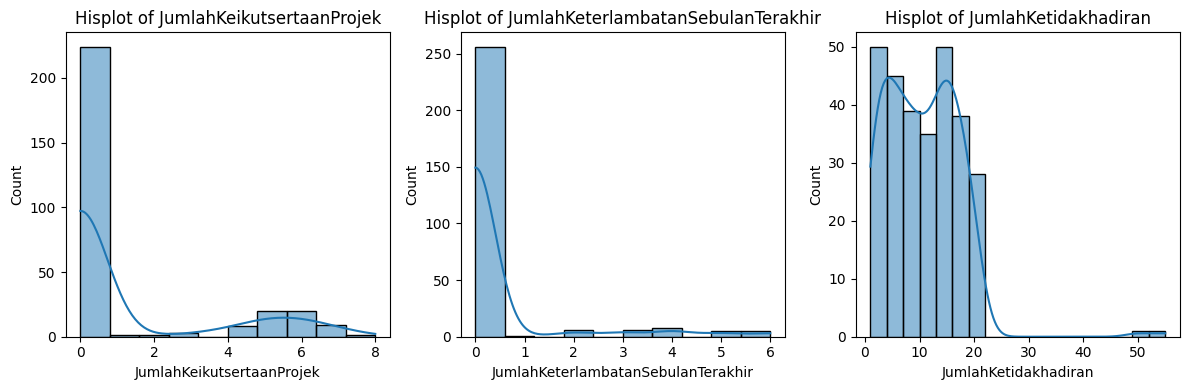

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, ax = ax[i], x=col, kde=True)
    ax[i].set_title(f'Hisplot of {col}')

plt.tight_layout()
plt.show()

In [63]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,JumlahKeikutsertaanProjek,1.565,0.702,Highly Positively Skewed
1,JumlahKeterlambatanSebulanTerakhir,3.118,8.674,Highly Positively Skewed
2,JumlahKetidakhadiran,1.588,8.241,Highly Positively Skewed


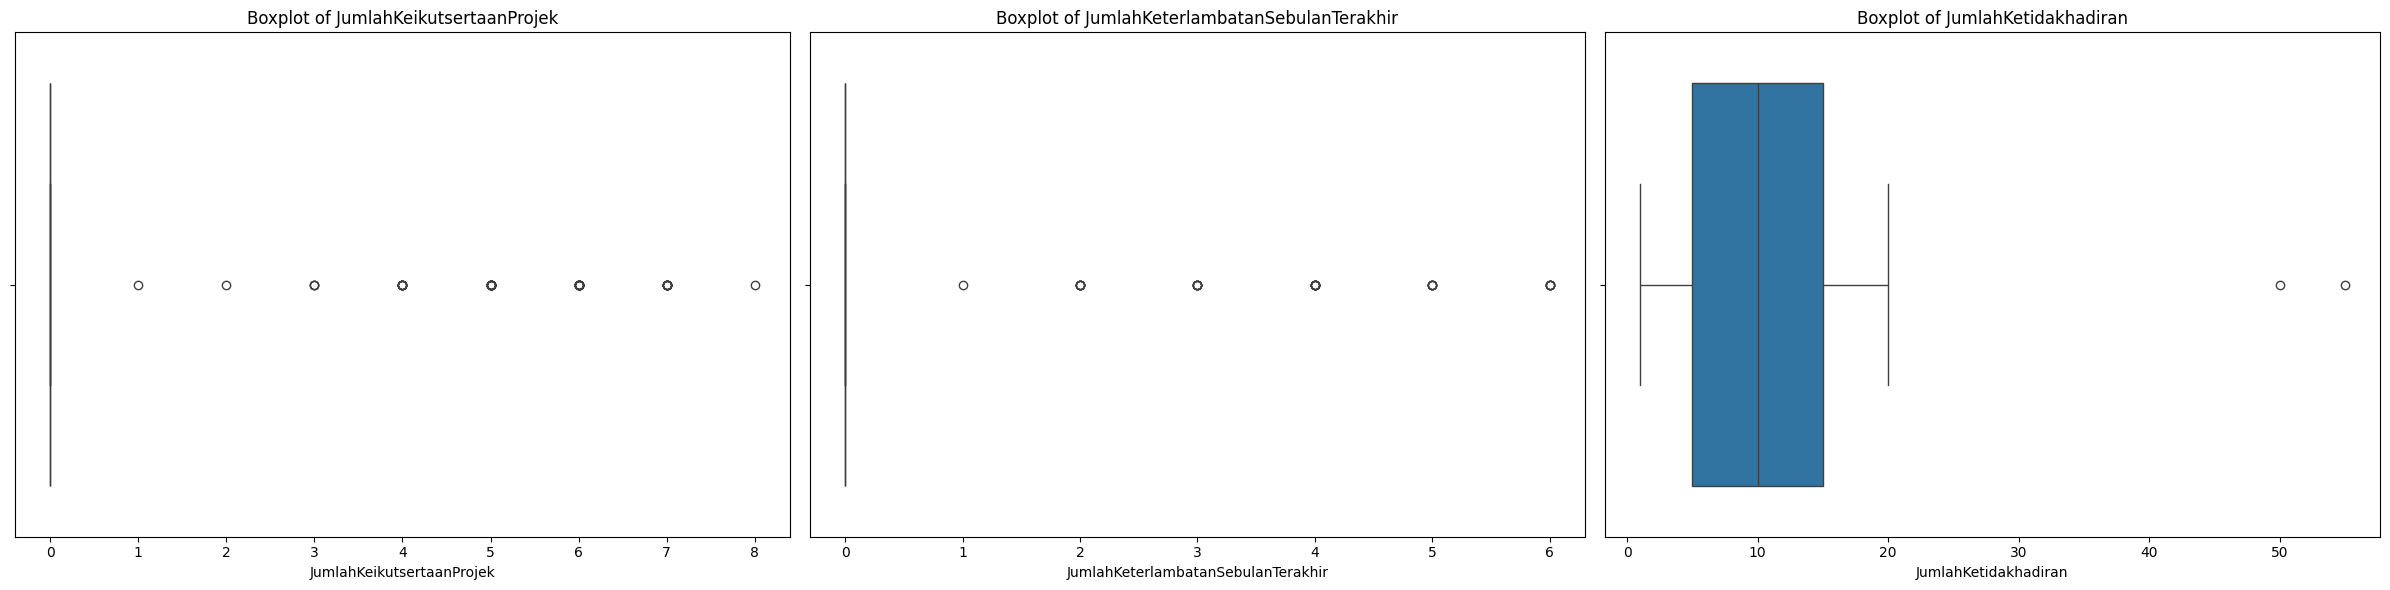

In [64]:
# Boxplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [66]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 287
Amount of Outlier Rows : 91
Amount of Non-Outlier Rows : 196
Percentage of Outliers : 31.71



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data,Percentage of Outlier
0,JumlahKeikutsertaanProjek,True,0.0,0.0,63,224,21.951220
1,JumlahKeterlambatanSebulanTerakhir,True,0.0,0.0,31,256,10.801394
2,JumlahKetidakhadiran,True,-10.0,30.0,2,285,0.696864


### Categorical 

In [47]:
cats_cols

['Username',
 'StatusPernikahan',
 'JenisKelamin',
 'StatusKepegawaian',
 'Pekerjaan',
 'JenjangKarir',
 'PerformancePegawai',
 'AsalDaerah',
 'HiringPlatform',
 'NomorHP',
 'Email',
 'TingkatPendidikan',
 'AlasanResign']

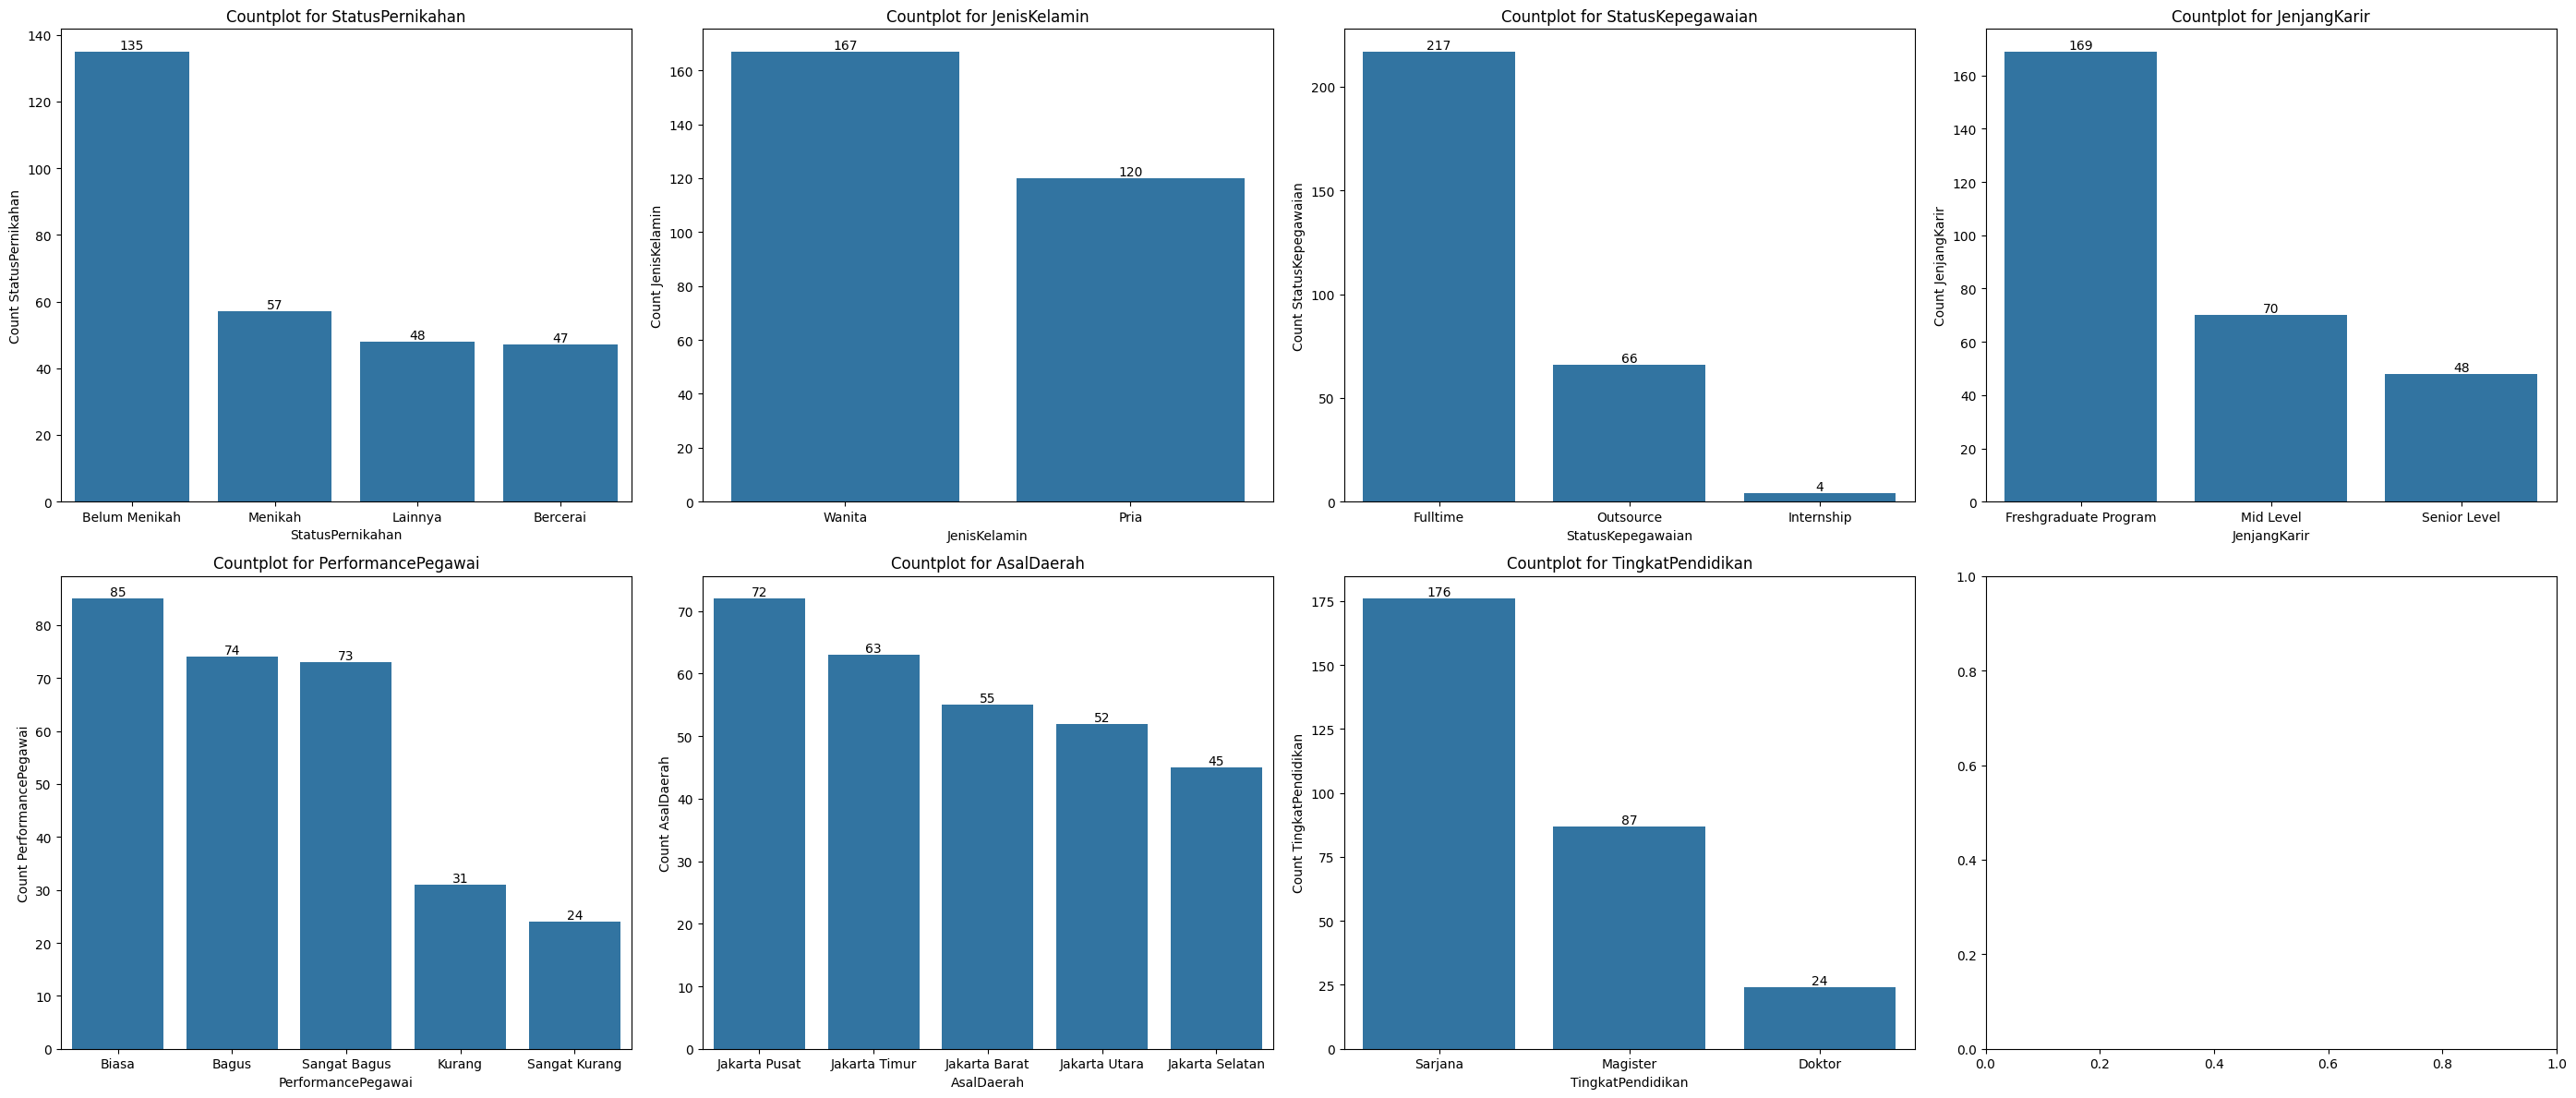

In [57]:
# Categorical Countplot (few unique values)
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(28, 12))
ax = ax.flatten()

cats_cols_few = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir',
                'PerformancePegawai', 'AsalDaerah', 'TingkatPendidikan']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

# del ax[7]

plt.tight_layout()
plt.show()

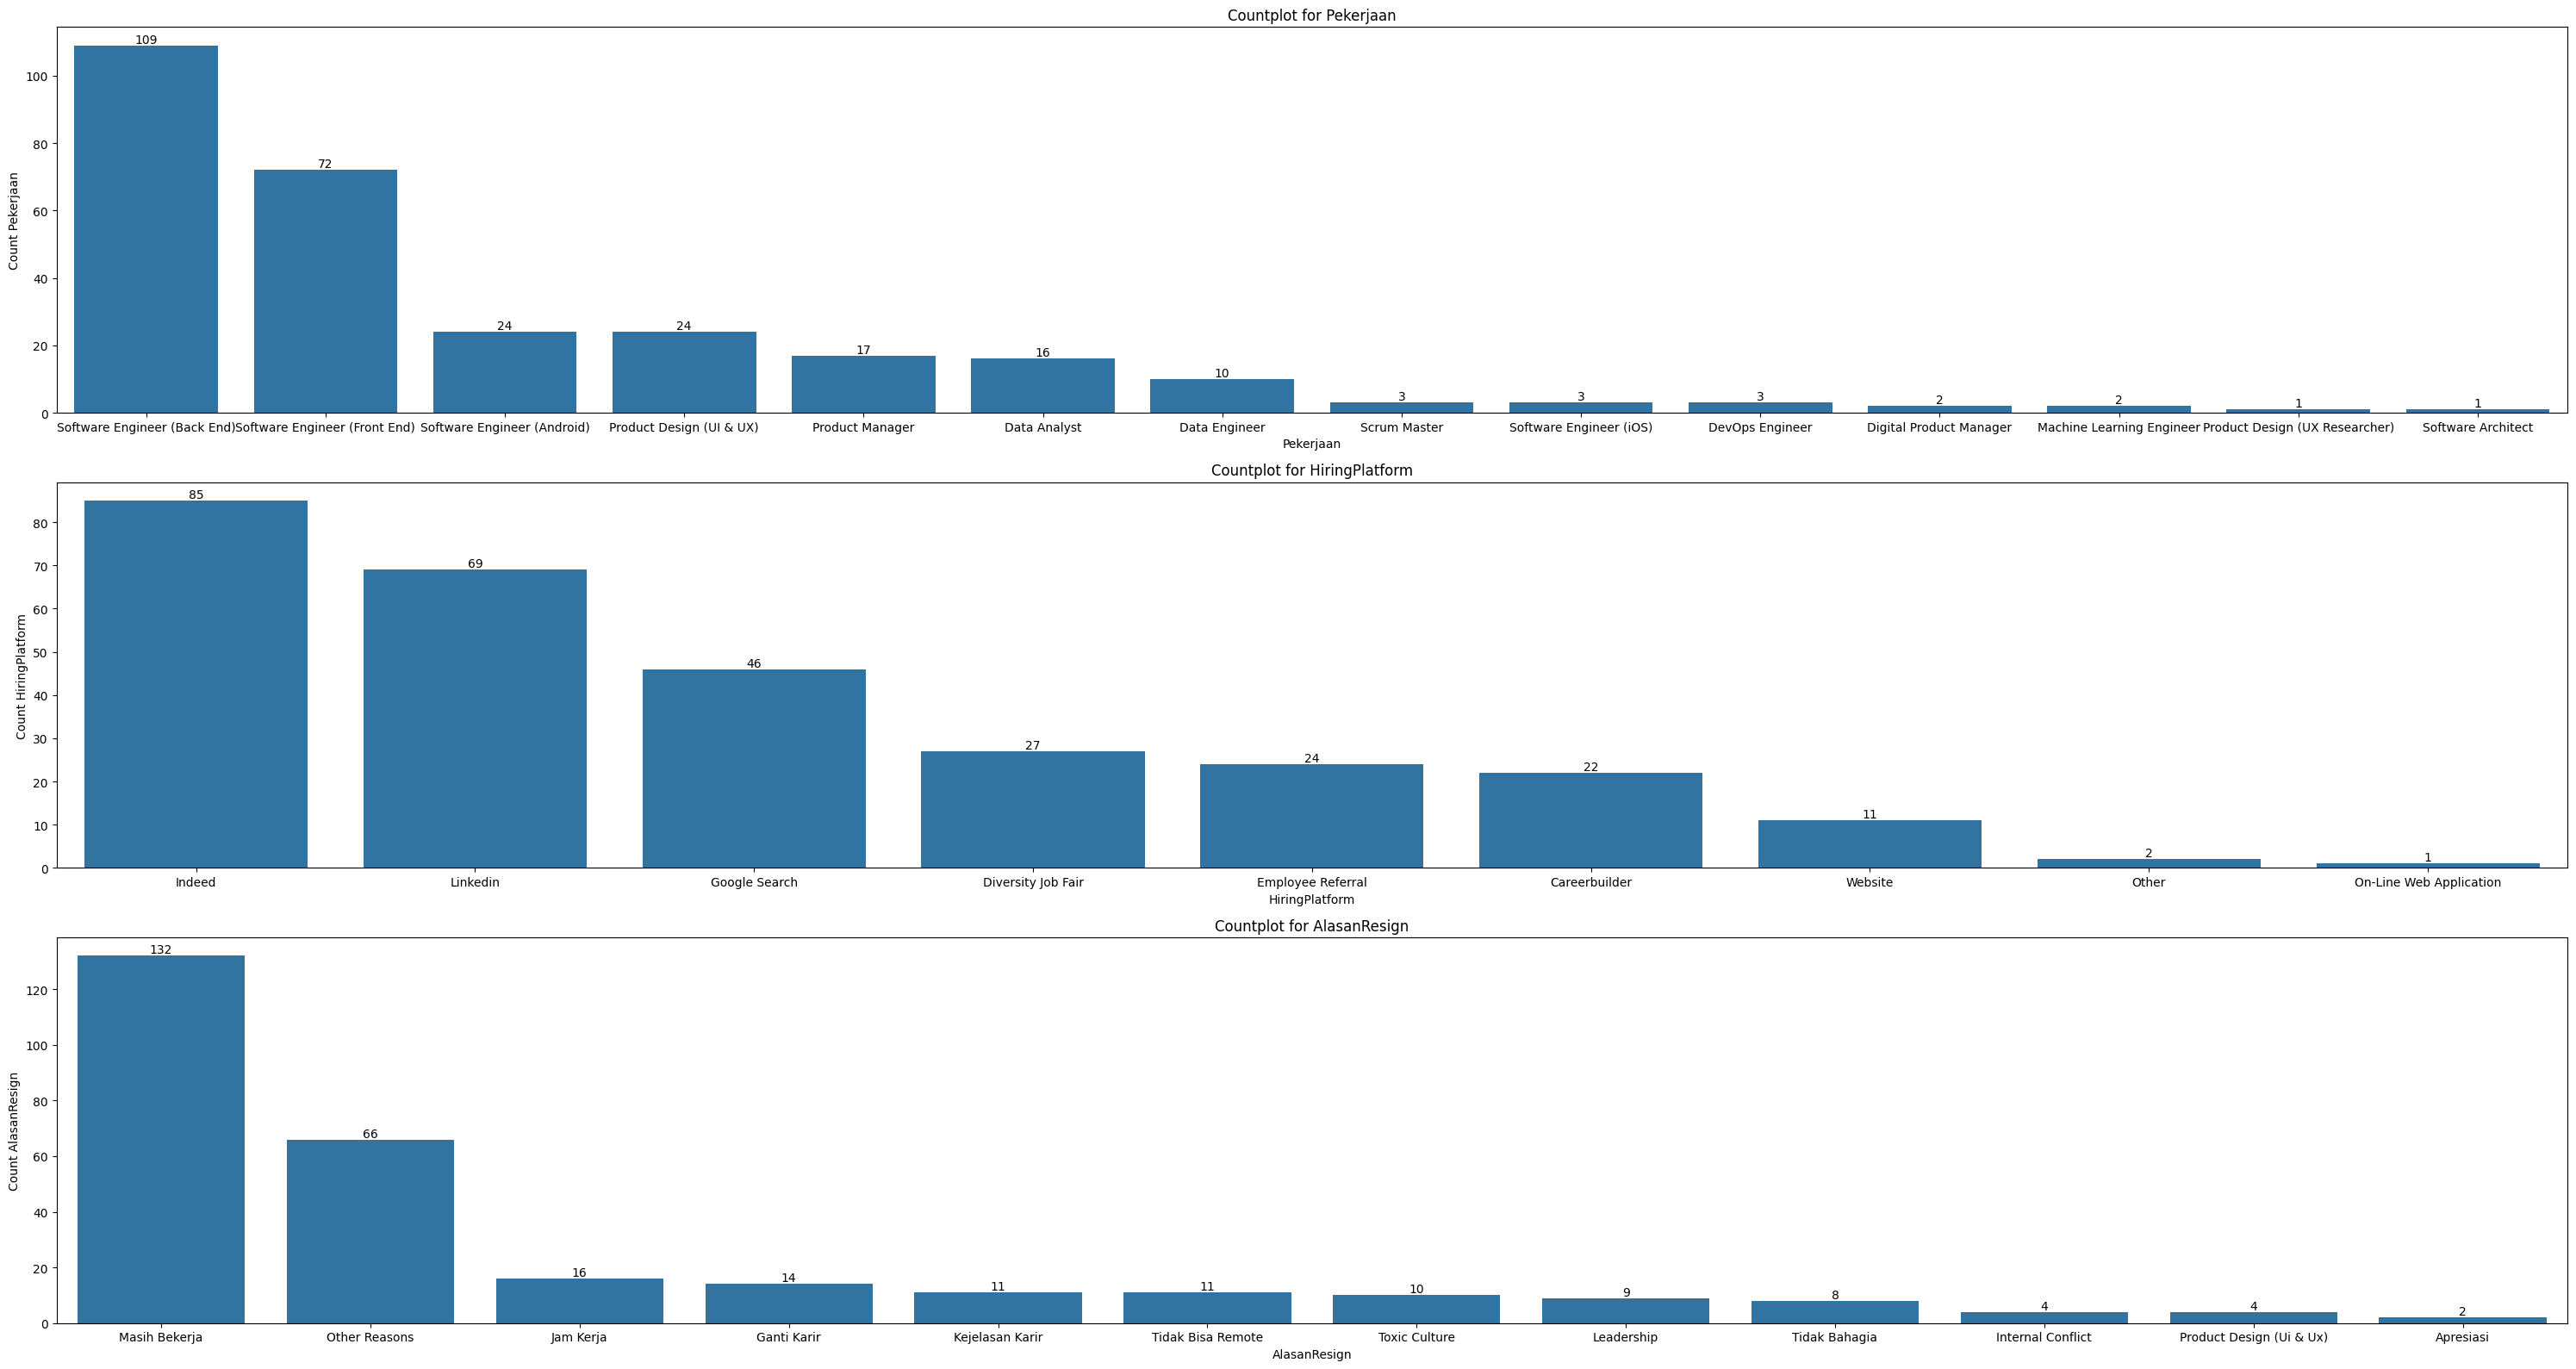

In [60]:
# Categorical Countplot (few unique values)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 16))
ax = ax.flatten()

cats_cols_many = ['Pekerjaan', 'HiringPlatform', 'AlasanResign']

for i, col in enumerate(cats_cols_many):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show()

## Multivariate Analysis

# **STAGE 2 : DATA PREPROCESSING**

## Feature Engineering

In [67]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
254,pitifulMallard6,111176,Bercerai,Wanita,Outsource,Product Manager,Mid Level,Sangat Kurang,Jakarta Selatan,Google Search,3,5,4,0,14,+6281977529xxx,pitifulMallard6993@outlook.com,Magister,Jam Kerja,1987-11-07,2013-11-11,2020-01-14,2018-06-08
87,peskyPudding8,110423,Belum Menikah,Wanita,Fulltime,Software Engineer (Front End),Freshgraduate Program,Sangat Bagus,Jakarta Timur,Diversity Job Fair,3,2,6,0,14,+6289859069xxx,peskyPudding8206@hotmail.com,Sarjana,Masih Bekerja,1987-11-24,2008-10-27,2020-01-15,NaT
1,jealousGelding2,106080,Belum Menikah,Pria,Fulltime,Data Analyst,Freshgraduate Program,Sangat Kurang,Jakarta Utara,Website,4,4,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,Toxic Culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16
229,kindEland7,105293,Belum Menikah,Wanita,Fulltime,Data Analyst,Mid Level,Sangat Bagus,Jakarta Barat,Indeed,4,5,0,0,15,+6289783478xxx,kindEland7431@hotmail.com,Sarjana,Masih Bekerja,1988-09-27,2008-01-07,2020-01-03,NaT
90,grumpyCow6,100597,Menikah,Pria,Fulltime,Software Engineer (Back End),Freshgraduate Program,Sangat Bagus,Jakarta Pusat,Indeed,3,4,3,2,2,+6289763743xxx,grumpyCow6508@icloud.com,Sarjana,Masih Bekerja,1988-04-15,2018-07-09,2020-01-31,NaT
